# Write program to implement KNN Binary classificatier - 1


In [7]:
Fever = [102,103,101,99.9,100,100,102,100,99.9,102,99.9,101,103,103,102]
sore_throat = ['yes','yes','no','yes','yes','no','no','no','yes','yes','yes','yes','no','no','no']
cold= ['yes','yes','yes','no','no','yes','yes','no','yes','no','no','yes','yes','yes','no']
covid_check= ['yes','yes','no','no','yes','yes','yes','no','no','yes','no','yes','yes','yes','no']
 #three features (Fever,sore throat and cold) and one label (covid check )
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
#converting string label into numbers.
sore_encoded=le.fit_transform(sore_throat)
print(sore_encoded)
cold_encoded=le.fit_transform(cold)
print(cold_encoded)
label=le.fit_transform(covid_check)
print(label)
                

[1 1 0 1 1 0 0 0 1 1 1 1 0 0 0]
[1 1 1 0 0 1 1 0 1 0 0 1 1 1 0]
[1 1 0 0 1 1 1 0 0 1 0 1 1 1 0]


In [8]:
# combining Features using zip function
features=list(zip(Fever, sore_encoded, cold_encoded))

In [9]:
# generating model ; k=3
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
#train the model using the training sets
model.fit(features, label)
predicted= model.predict([[102,0,0]])  # 102 = Fever, 1:sore throat, 1:cold
print(predicted)

[1]


In [10]:
model.score(features, label)

0.7333333333333333

In [7]:
# model prediction for k:2
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
#train the model using the training sets
model.fit(features, label)
predicted= model.predict([[102,0,0]])  # 102 = Fever, 1:sore throat, 1:cold
print(predicted)

[1]


# Write a program to implement KNN binary classifier -2

In [40]:
weight= [51,62,69,64,65,56,58,57,58,60]
height=[167,182,176,173,172,174,169,173,170,175]
label=['underweight','normal','normal','normal','normal','underweight','normal','normal','normal','underweight']

In [41]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
class_label=le.fit_transform(label)
print(label)

['underweight', 'normal', 'normal', 'normal', 'normal', 'underweight', 'normal', 'normal', 'normal', 'underweight']


In [42]:
print(class_label)

[1 0 0 0 0 1 0 0 0 1]


In [43]:
features = list(zip(weight, height))

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
#train the model using the training sets
model.fit(features, class_label)
predicted= model.predict([[57,170]])  
print(predicted)

[0]


#  KNN classifier with multi labels

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
categories = ['alt.atheism','soc.religion.christian','comp.graphics','sci.med']

In [3]:
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)




In [4]:
twenty_train.target_names
['alt.atheism','comp.graphics','sci.med','soc.religion.christian']


['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [5]:
len(twenty_train.data)

2257

In [6]:
len(twenty_train.filenames)

2257

In [7]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


In [8]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [9]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [10]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect= CountVectorizer()
X_train_counts=count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
clf = KNeighborsClassifier().fit(X_train_tf, twenty_train.target)


In [15]:
docs_new = ['God is love', 'Open on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf= tf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)
for doc , category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))


'God is love' => alt.atheism
'Open on the GPU is fast' => soc.religion.christian


In [16]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
     ('clf' , KNeighborsClassifier()),
    ])

In [17]:
import numpy as np
categories = ['alt.atheism','soc.religion.christian','comp.graphics','sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)


In [18]:
docs_test = twenty_train.data
X_new_counts = count_vect.transform(docs_test)
X_new_tfidf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)

In [19]:
np.mean(predicted == twenty_train.target)

0.8555604785112981

# Write a program that implements decision tree on student data

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [17]:
!pip install pydotplus
import six
import sys
sys.modules['sklearn.externals.six']=six
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [18]:
import pandas as pd
df = pd.read_csv(r"C:\Users\jades\OneDrive\Documents\decision tree.csv")
d= {'sunny':0,'overcast':1,'rain':2}
e={'hot':0,'mild':1,'cool':2}
f={'high':0,'normal':1}
g={'weak':0,'strong':1}
h={'yes':0,'no':1}
df['outlook']=df['outlook'].map(d)
df['Temprature']=df['Temprature'].map(e)
df['humidity']=df['humidity'].map(f)
df['wild']=df['wild'].map(g)
df['Play_Golf']=df['Play_Golf'].map(h)

In [19]:
df.info()
import pandas as pd
df = pd.read_csv(r"C:\Users\jades\OneDrive\Documents\decision tree.csv")
d= {'sunny':0,'overcast':1,'rain':2}
e={'hot':0,'mild':1,'cool':2}
f={'high':0,'normal':1}
g={'weak':0,'strong':1}
h={'yes':0,'no':1}
df['outlook']=df['outlook'].map(d)
df['Temprature']=df['Temprature'].map(e)
df['humidity']=df['humidity'].map(f)
df['wild']=df['wild'].map(g)
df['Play_Golf']=df['Play_Golf'].map(h)
df.isnull().any()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   outlook     30 non-null     int64
 1   Temprature  30 non-null     int64
 2   humidity    30 non-null     int64
 3   wild        30 non-null     int64
 4   Play_Golf   30 non-null     int64
dtypes: int64(5)
memory usage: 1.3 KB


outlook       False
Temprature    False
humidity      False
wild          False
Play_Golf     False
dtype: bool

In [20]:
features=['outlook','Temprature','humidity','wild']
x=df[features]
y=df['Play_Golf']
print(x)
print(y)

    outlook  Temprature  humidity  wild
0         0           0         0     0
1         0           0         0     1
2         1           0         0     0
3         2           1         0     0
4         2           2         1     0
5         2           2         1     1
6         1           2         1     0
7         0           1         0     0
8         0           2         1     0
9         0           1         1     1
10        1           1         1     1
11        2           1         0     0
12        0           0         1     1
13        1           1         0     0
14        0           0         1     0
15        1           1         1     1
16        2           1         0     0
17        0           2         0     1
18        1           2         0     0
19        0           1         0     1
20        2           1         1     0
21        0           0         1     0
22        1           2         1     1
23        2           1         0     1


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,random_state=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=2,random_state=0)
clf.fit(x_train,y_train)
clf.predict(x_test)

array([1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [25]:
plot_tree(clf)

NameError: name 'plot_tree' is not defined

In [24]:
from sklearn import metrics
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
Classification_report=metrics.classification_report(y_test,y_pred)

print("Classification_report-\n",metrics.classification_report(y_test,y_pred))


Accuracy: 0.75
Classification_report-
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.33      1.00      0.50         1

    accuracy                           0.75         8
   macro avg       0.67      0.86      0.67         8
weighted avg       0.92      0.75      0.79         8



In [ ]:
pip install --upgrade graphviz pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('work.pdf')
import matplotlib.pyplot as plt

Image(graph.create_png())

In [26]:
features=['outlook','Temprature','humidity','wild']
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['yes','no'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
print(dot_data.getvalue())

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
Image(graph.create_png())

NameError: name 'StringIO' is not defined

In [15]:
sns.pairplot(data=df,hue='Play_Golf')

NameError: name 'sns' is not defined

In [6]:
sns.heatmap(df.corr())

NameError: name 'sns' is not defined

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
all_sample_title='Accuracy Score:{0}'.format(clf.score(x_test,y_test))
plt.title(all_sample_title,size=10)

#  Write a program implentation of decision tree on Diabetes data

In [128]:
import pandas as pd
df=pd.read_csv(r"C:\Users\jades\Downloads\archive\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [130]:
x=df.values[:,0:8]
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [131]:
y=df.values[:,8]
print(y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [132]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)


In [133]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [134]:
y_pred_en=clf_entropy.predict(x_test)
print(y_pred_en)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [135]:
from sklearn.metrics import accuracy_score


print(("Accuracy:"),accuracy_score(y_test, y_pred_en)*100)

Accuracy: 69.48051948051948


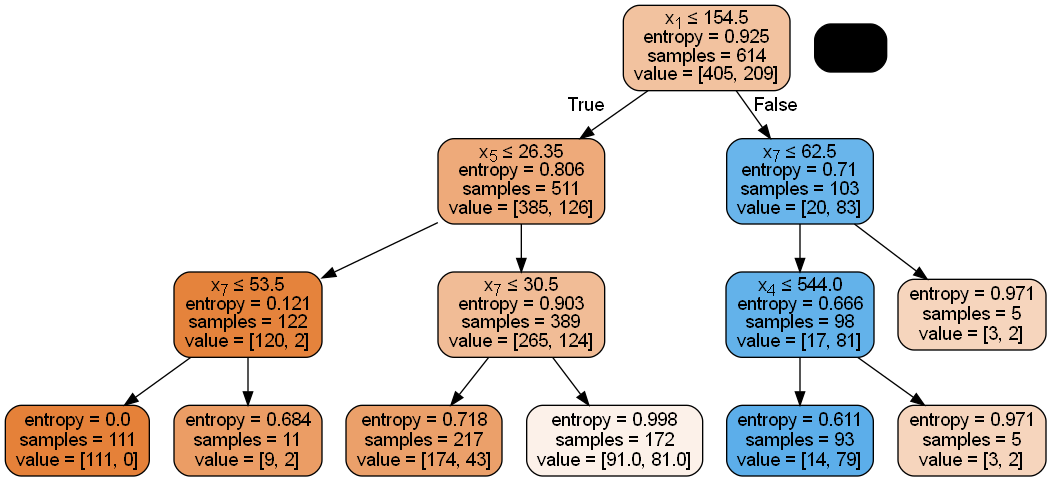

In [136]:
import matplotlib.pyplot as plt
import six
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image
dot_data=StringIO()
export_graphviz(clf_entropy,out_file=dot_data ,filled=True,rounded=True,special_characters=True)
graph.write_png('diabetes.png')

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [137]:
print(list(df))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


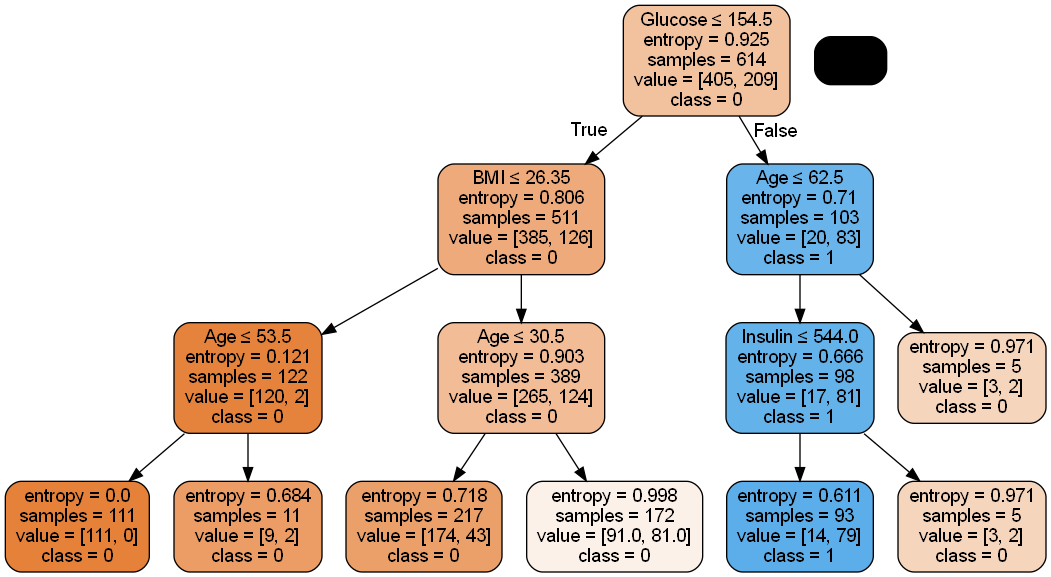

In [138]:
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data=StringIO()
export_graphviz(clf_entropy,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())                        

[Text(0.5769230769230769, 0.875, 'x[1] <= 154.5\nentropy = 0.925\nsamples = 614\nvalue = [405, 209]'),
 Text(0.3076923076923077, 0.625, 'x[5] <= 26.35\nentropy = 0.806\nsamples = 511\nvalue = [385, 126]'),
 Text(0.15384615384615385, 0.375, 'x[7] <= 53.5\nentropy = 0.121\nsamples = 122\nvalue = [120, 2]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.46153846153846156, 0.375, 'x[7] <= 30.5\nentropy = 0.903\nsamples = 389\nvalue = [265, 124]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.718\nsamples = 217\nvalue = [174, 43]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.998\nsamples = 172\nvalue = [91.0, 81.0]'),
 Text(0.8461538461538461, 0.625, 'x[7] <= 62.5\nentropy = 0.71\nsamples = 103\nvalue = [20, 83]'),
 Text(0.7692307692307693, 0.375, 'x[4] <= 544.0\nentropy = 0.666\nsamples = 98\nvalue = [17, 81]'),
 Text(0.6923076923076923, 0.125, 'entropy = 

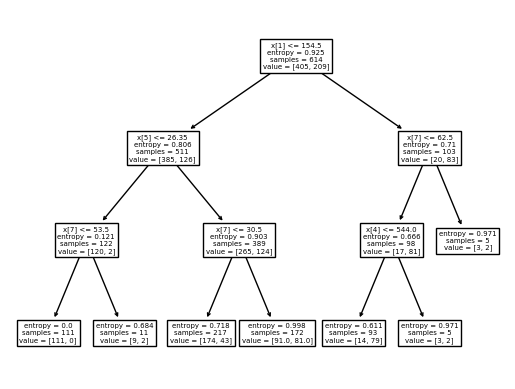

In [139]:
from sklearn.tree import plot_tree
plot_tree(clf_entropy)

#  Write a program that implementations Naive bayes

In [162]:
import pandas as pd
df=pd.read_csv(r"C:\Users\jades\OneDrive\documents\Mah.csv")



In [163]:
d={'regularly':0,'occasionaly':1,'no':2}
e={'no':0,'yes':1}
f={'no':0,'yes':1}
g={'no':0,'yes':1}
df['saree-or-pheta']=df['saree-or-pheta'].map(d)
df['misal']=df['misal'].map(e)
df['vada-pav']=df['vada-pav'].map(f)
df['puran-poli']=df['puran-poli'].map(g)

In [164]:
features=['Age','saree-or-pheta','misal','vada-pav','puran-poli']
X=df[features]
Y=df['Maharashtrian']
print(X)
print(Y)

    Age  saree-or-pheta  misal  vada-pav  puran-poli
0    52               0      1         0           1
1    22               1      1         1           1
2    28               2      0         1           0
3    55               0      1         1           1
4    30               1      0         1           0
5    32               2      1         1           0
6    27               2      1         1           0
7    54               1      0         1           0
8    63               2      0         0           0
9    63               0      1         0           0
10   40               1      1         1           0
11   65               0      0         0           0
12   37               1      1         1           1
13   23               2      1         1           1
14   70               0      0         0           0
15   60               1      0         0           1
16   65               2      1         1           1
17   25               0      1         0      

In [165]:
features=['Age','saree-or-pheta','misal','vada-pav','puran-poli']
X=df[features]
Y=df['Maharashtrian']
print(X)
print(Y)

    Age  saree-or-pheta  misal  vada-pav  puran-poli
0    52               0      1         0           1
1    22               1      1         1           1
2    28               2      0         1           0
3    55               0      1         1           1
4    30               1      0         1           0
5    32               2      1         1           0
6    27               2      1         1           0
7    54               1      0         1           0
8    63               2      0         0           0
9    63               0      1         0           0
10   40               1      1         1           0
11   65               0      0         0           0
12   37               1      1         1           1
13   23               2      1         1           1
14   70               0      0         0           0
15   60               1      0         0           1
16   65               2      1         1           1
17   25               0      1         0      

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20,random_state=0)


In [167]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [168]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [169]:
from sklearn.naive_bayes import BernoulliNB
clf=BernoulliNB()
clf.fit(X_train,Y_train)

BernoulliNB()

In [170]:
Y_pred=clf.predict(X_test)
Y_pred

array([0, 0, 1, 0], dtype=int64)

In [171]:
y_test

2     0
28    0
13    1
10    0
26    0
24    0
27    0
11    0
Name: Play_Golf, dtype: int64

In [172]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)


In [173]:
ac

0.75

In [174]:
cm

array([[5, 2],
       [0, 1]], dtype=int64)

#  Write  a program that on k-means clustering algorithm

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv(r"C:\Users\jades\OneDrive\Documents\STUDENTS MARKS.CSV")
df.head()

,STUDENTS,STATISTIC,AI\ML,DL,PYTHON
0,NEHA,41,96,47,85
1,SONAL,42,88,48,89
2,KIRAN,43,78,49,42
3,SANTOSH,44,96,50,63
4,SANIKA,45,63,51,41


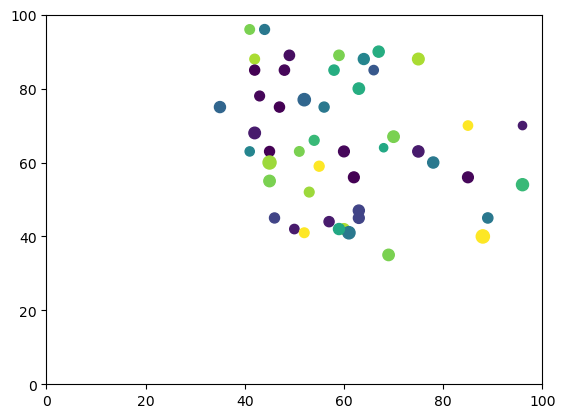

In [183]:
import matplotlib.pyplot as plt
plt.scatter(df['STATISTIC'],df['AI\ML'],df['DL'],df['PYTHON'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [184]:
x=df.iloc[:,1:5]
x


,STATISTIC,AI\ML,DL,PYTHON
0,41,96,47,85
1,42,88,48,89
2,43,78,49,42
3,44,96,50,63
4,45,63,51,41
5,46,45,52,52
6,47,75,53,41
7,48,85,54,42
8,49,89,55,43
9,50,42,45,45
